<a href="https://colab.research.google.com/github/Loop3D/Kalgoorlie_3Dmodelling/blob/main/report_files_faults/13%20-%20Fault%20networks%20graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if 'google.colab' in str(get_ipython()):
      !git clone https://github.com/Loop3D/Kalgoorlie_fault_network.git
      %cd Kalgoorlie_fault_network/report_files_faults
      !apt install libgraphviz-dev
      !pip install pygraphviz

else:
      print('Not running on CoLab, nothing to do')

Not running on CoLab, nothing to do


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from networkx.algorithms.components import weakly_connected_components

In [4]:
# Graph1 - surface (valid for all)

G1 = nx.DiGraph()

#add nodes
G1.add_node('Ida')
G1.add_node('Kunanalling')
G1.add_node('Bulabulling')
G1.add_node('Zuleika')
G1.add_node('Boulder Lefroy')
G1.add_node('Abattoir West')
G1.add_node('Abattoir East')
G1.add_node('Boorara')
G1.add_node('Kanowna')
G1.add_node('MtMonger')
G1.add_node('Black Flag')
G1.add_node('Tramways')
G1.add_node('Speedway')

G1.add_edge("Black Flag", "Zuleika")
G1.add_edge("Black Flag", "Boorara")

G1.add_edge("Boulder Lefroy", "Boorara")
G1.add_edge("Abattoir West", "Boorara")
G1.add_edge("Abattoir East", "Boorara")

G1.add_edge("Kanowna", "MtMonger")
G1.add_edge("Speedway", "Abattoir East")
G1.add_edge("Abattoir West", "Zuleika", label='Inf') 
G1.add_edge("Abattoir East", "Zuleika", label='Inf')
G1.add_edge("Tramways", "Speedway")
G1.add_edge("Tramways", "Boorara")

In [5]:
names = ['Ida', 'Kunanalling', 'Bulabulling', 'Zuleika', 'Boulder Lefroy', 'Abattoir West', 'Abattoir East', 
        'Boorara','Kanowna','MtMonger', 'Black Flag', 'Tramways', 'Speedway'] 

colours = np.arange(len(names))
nodes = [n for n in names]
node_colours = {nodes[i]: colours[i] for i in range(len(colours))}

pos = nx.nx_agraph.graphviz_layout(G1, prog = "dot")#, args = "-Gepsilon=0.0005 -Gmode='major'")
colours = np.arange(len(G1.nodes))
d = dict(G1.degree)


plt.figure(figsize=(12, 5))
plt.subplot(121)

for i, h in enumerate(weakly_connected_components(G1)):
    sub = G1.subgraph(h)
    colours = [d[list(sub.nodes)[n]] for n in range(len(list(sub.nodes)))]
    
    nx.draw(sub, pos, node_color=colours, edge_color = 'black', cmap='BuPu',  
                    node_size=np.array(list(d.values()))[i]+3000, 
            node_shape = 'o', alpha = 0.5, linewidths=1, edgecolors = 'black')
    
    nx.draw_networkx_labels(sub, pos, font_size=8, font_family='sans-serif')

plt.margins(y = .1, x=.1)
plt.title("Abutting relationships from geological map")

plt.subplot(122)

G2 = nx.DiGraph()

#add nodes
G2.add_node('Ida')
G2.add_node('Kunanalling')
G2.add_node('Bulabulling')
G2.add_node('Zuleika')
G2.add_node('Boulder Lefroy')
G2.add_node('Abattoir West')
G2.add_node('Abattoir East')
G2.add_node('Boorara')
G2.add_node('Kanowna')
G2.add_node('MtMonger')
G2.add_node('Black Flag')
G2.add_node('Tramways')
G2.add_node('Speedway')

G2.add_edge("Zuleika", "Boulder Lefroy", label='L1') # line 1
G2.add_edge("Black Flag", "Boulder Lefroy", label='L1') #line 1
G2.add_edge("Abattoir West", "Boulder Lefroy", label='L2') #line 2
G2.add_edge("Abattoir East", "Boulder Lefroy", label='L2') #line 2
G2.add_edge("Boorara", "Kanowna",  label='L2') #line 2
G2.add_edge("Boorara", "MtMonger", label='L3') #line 3
G2.add_edge("Boorara", "Boulder Lefroy",  label='L5') # line 5
G2.add_edge("Zuleika", "Speedway",  label='L6') #line 6

names = ['Ida', 'Kunanalling', 'Bulabulling', 'Zuleika', 'Boulder Lefroy', 'Abattoir West', 'Abattoir East', 
        'Boorara','Kanowna','MtMonger', 'Black Flag', 'Tramways', 'Speedway'] 

colours = np.arange(len(names))
nodes = [n for n in names]
node_colours = {nodes[i]: colours[i] for i in range(len(colours))}

pos = nx.nx_agraph.graphviz_layout(G2, prog = "neato", args = "-Gepsilon=0.0001")

colours = np.arange(len(G2.nodes))
d = dict(G2.degree)

for i, h in enumerate(weakly_connected_components(G2)):
    sub = G2.subgraph(h)
    colours = [d[list(sub.nodes)[n]] for n in range(len(list(sub.nodes)))]
    
    nx.draw(sub, pos, node_color=colours, edge_color = 'black', cmap='BuPu',  
                    node_size=np.array(list(d.values()))[i]+3000, 
            node_shape = 'o', alpha = 0.5, linewidths=1, edgecolors = 'black')
    
    nx.draw_networkx_labels(sub, pos, font_size=8, font_family='sans-serif')
    
    edge_labels = nx.get_edge_attributes(sub,'label')
    
    if len(edge_labels)==0:
        pass
    else:
        nx.draw_networkx_edge_labels(sub, pos, edge_labels = edge_labels, font_size=7)

        
plt.margins(y = .1, x=.1)
plt.title("Abutting relationships from seismic data")
############ 


plt.tight_layout()
plt.savefig("./outputs/fault_topology/2_together.png", dpi = 500, bbox_inches = 'tight')

ImportError: requires pygraphviz http://pygraphviz.github.io/

In [190]:
# Graph of the depth relationships

In [11]:
# Graph2 - depth

G2 = nx.DiGraph()

#add nodes
G2.add_node('Ida')
G2.add_node('Kunanalling')
G2.add_node('Bulabulling')
G2.add_node('Zuleika')
G2.add_node('Boulder Lefroy')
G2.add_node('Abattoir West')
G2.add_node('Abattoir East')
G2.add_node('Boorara')
G2.add_node('Kanowna')
G2.add_node('MtMonger')
G2.add_node('Black Flag')
G2.add_node('Tramways')
G2.add_node('Speedway')

G2.add_edge("Zuleika", "Boulder Lefroy", label='L1') # line 1
G2.add_edge("Black Flag", "Boulder Lefroy", label='L1') #line 1
G2.add_edge("Abattoir West", "Boulder Lefroy", label='L2') #line 2
G2.add_edge("Abattoir East", "Boulder Lefroy", label='L2') #line 2
G2.add_edge("Boorara", "Kanowna",  label='L2') #line 2
G2.add_edge("Boorara", "MtMonger", label='L3') #line 3
G2.add_edge("Boorara", "Boulder Lefroy",  label='L5') # line 5
G2.add_edge("Zuleika", "Speedway",  label='L6') #line 6

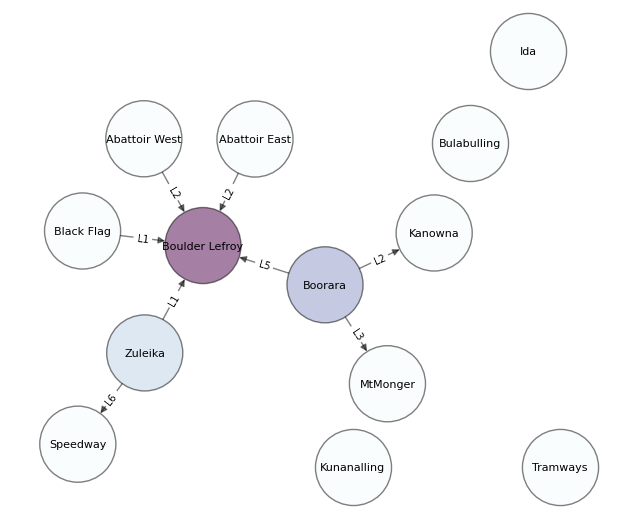

In [28]:
names = ['Ida', 'Kunanalling', 'Bulabulling', 'Zuleika', 'Boulder Lefroy', 'Abattoir West', 'Abattoir East', 
        'Boorara','Kanowna','MtMonger', 'Black Flag', 'Tramways', 'Speedway'] 

colours = np.arange(len(names))
nodes = [n for n in names]
node_colours = {nodes[i]: colours[i] for i in range(len(colours))}

pos = nx.nx_agraph.graphviz_layout(G2, prog = "neato", args = "-Gepsilon=0.0001")

colours = np.arange(len(G2.nodes))
d = dict(G2.degree)

fig = plt.figure(1, figsize = (6,5)) 

for i, h in enumerate(weakly_connected_components(G2)):
    sub = G2.subgraph(h)
    colours = [d[list(sub.nodes)[n]] for n in range(len(list(sub.nodes)))]
    
    nx.draw(sub, pos, node_color=colours, edge_color = 'black', cmap='BuPu',  
                    node_size=np.array(list(d.values()))[i]+3000, 
            node_shape = 'o', alpha = 0.5, linewidths=1, edgecolors = 'black')
    
    nx.draw_networkx_labels(sub, pos, font_size=8, font_family='sans-serif')
    
    edge_labels = nx.get_edge_attributes(sub,'label')
    
    if len(edge_labels)==0:
        pass
    else:
        nx.draw_networkx_edge_labels(sub, pos, edge_labels = edge_labels, font_size=7)
        
plt.margins(y = .1, x=.1)
# plt.show()
plt.savefig("C:/Users/aafo0002/Documents/From_seismic.tiff", dpi = 300, bbox_inches = 'tight')

In [13]:
# Graph2 - depth

G3 = nx.DiGraph()

#add nodes
G3.add_node('Ida')
G3.add_node('Kunanalling')
G3.add_node('Bulabulling')
G3.add_node('Zuleika')
G3.add_node('Boulder Lefroy')
G3.add_node('Abattoir West')
G3.add_node('Abattoir East')
G3.add_node('Boorara')
G3.add_node('Kanowna')
G3.add_node('MtMonger')
G3.add_node('Black Flag')
G3.add_node('Tramways')
G3.add_node('Speedway')

# Inferred from depth
G3.add_edge("Boorara", "Kanowna", label='Inf') 
G3.add_edge("Boorara", "MtMonger", label='Inf') 
G3.add_edge("Bullabulling", "Kunanalling", label='Inf') 
G3.add_edge("Bullabulling", "Kanowna", label='Inf') 
G3.add_edge("Kunanalling", "Ida", label='Inf') 
G3.add_edge("Kunanalling", "Boulder Lefroy", label='Inf') 
G3.add_edge("Kunanalling", "Boorara", label='Inf') 
G3.add_edge("Kanowna", "MtMonger", label='Inf') 
G3.add_edge("Kanowna", "Ida", label='Inf') 
G3.add_edge("MtMonger", "Ida", label='Inf') 
G3.add_edge("Boulder Lefroy", "Boorara", label='Inf') 
G3.add_edge("Abattoir West", "Boorara", label='Inf') 
G3.add_edge("Abattoir East", "Boorara", label='Inf') 
G3.add_edge("Abattoir West", "Boulder Lefroy", label='Inf') 
G3.add_edge("Abattoir East", "Boulder Lefroy", label='Inf') 
G3.add_edge("Speedway", "Boulder Lefroy", label='Inf') 
G3.add_edge("Zuleika", "Boulder Lefroy", label='Inf') 
G3.add_edge("Zuleika", "Kanowna", label='Inf') 
G3.add_edge("Boulder Lefroy", "Ida", label='Inf') 
G3.add_edge("Zuleika", "Boorara", label='Inf') 
G3.add_edge("Black Flag", "Kanowna", label='Inf') 
G3.add_edge("Boulder Lefroy", "Kanowna", label='Inf') 

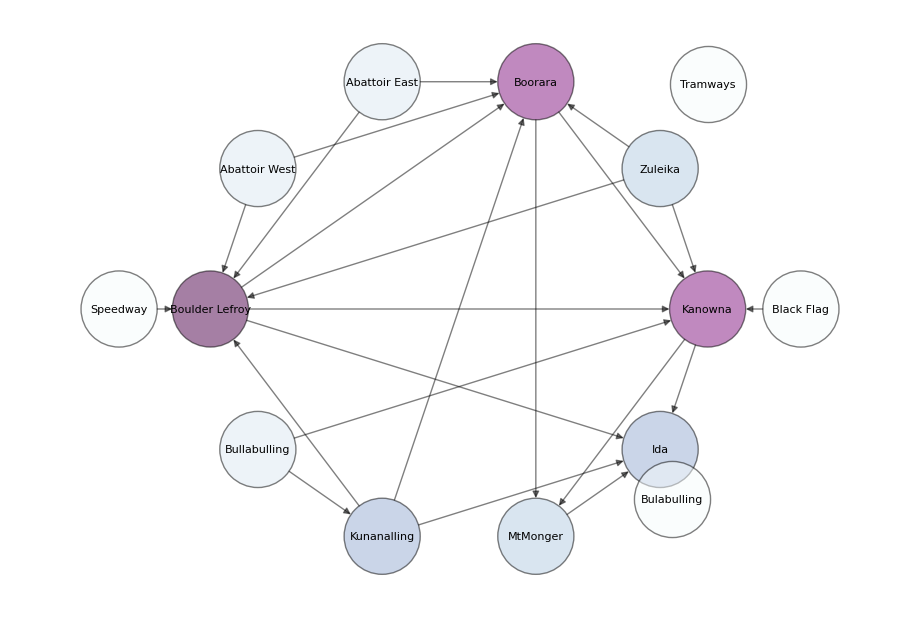

In [14]:
names = ['Ida', 'Kunanalling', 'Bulabulling', 'Zuleika', 'Boulder Lefroy', 'Abattoir West', 'Abattoir East', 
        'Boorara','Kanowna','MtMonger', 'Black Flag', 'Tramways', 'Speedway'] 

colours = np.arange(len(names))
nodes = [n for n in names]
node_colours = {nodes[i]: colours[i] for i in range(len(colours))}

pos = nx.nx_agraph.graphviz_layout(G3, prog = "circo")

colours = np.arange(len(G3.nodes))
d = dict(G3.degree)

fig = plt.figure(1, figsize = (9,6)) 

for i, h in enumerate(weakly_connected_components(G3)):
    sub = G3.subgraph(h)
    colours = [d[list(sub.nodes)[n]] for n in range(len(list(sub.nodes)))]
    
    nx.draw(sub, pos, node_color=colours, edge_color = 'black', cmap='BuPu',  
                    node_size=np.array(list(d.values()))[i]+3000, 
            node_shape = 'o', alpha = 0.5, linewidths=1, edgecolors = 'black')
    
    nx.draw_networkx_labels(sub, pos, font_size=8, font_family='sans-serif')
    
#     edge_labels = nx.get_edge_attributes(sub,'label')
    
#     if len(edge_labels)==0:
#         pass
#     else:
#         nx.draw_networkx_edge_labels(sub, pos, edge_labels = edge_labels, font_size=7)
        
plt.margins(y = .1, x=.1)
plt.show()

In [15]:
# all relationships

# Graph1 - surface (valid for all)

G4 = nx.DiGraph()

#add nodes
G4.add_node('Ida')
G4.add_node('Kunanalling')
G4.add_node('Bulabulling')
G4.add_node('Zuleika')
G4.add_node('Boulder Lefroy')
G4.add_node('Abattoir West')
G4.add_node('Abattoir East')
G4.add_node('Boorara')
G4.add_node('Kanowna')
G4.add_node('MtMonger')
G4.add_node('Black Flag')
G4.add_node('Tramways')
G4.add_node('Speedway')

G4.add_edge("Black Flag", "Zuleika", label='Map', n=1)
G4.add_edge("Black Flag", "Boorara", label='Map', n=1)
G4.add_edge("Boulder Lefroy", "Boorara", label='Map', n=1)
G4.add_edge("Abattoir West", "Boorara", label='Map', n=1)
G4.add_edge("Abattoir East", "Boorara", label='Map', n=1)
G4.add_edge("Kanowna", "MtMonger", label='Map', n=1)
G4.add_edge("Speedway", "Abattoir East", label='Map', n=1)
G4.add_edge("Abattoir West", "Zuleika", label='Map', n=1) 
G4.add_edge("Abattoir East", "Zuleika", label='Map', n=1)
G4.add_edge("Tramways", "Speedway", label='Map', n=1)
G4.add_edge("Tramways", "Boorara", label='Map', n=1)

G4.add_edge("Zuleika", "Boulder Lefroy", label='L1', n=2) # line 1
G4.add_edge("Black Flag", "Boulder Lefroy", label='L1', n=2) #line 1
G4.add_edge("Abattoir West", "Boulder Lefroy", label='L2', n=2) #line 2
G4.add_edge("Abattoir East", "Boulder Lefroy", label='L2', n=2) #line 2
G4.add_edge("Boorara", "Kanowna",  label='L2', n=2) #line 2
G4.add_edge("Boorara", "MtMonger", label='L3', n=2) #line 3
G4.add_edge("Boorara", "Boulder Lefroy",  label='L5', n=2) # line 5
G4.add_edge("Zuleika", "Speedway",  label='L6', n=2) #line 6

# Inferred from depth
G4.add_edge("Boorara", "Kanowna", label='Inf', n=3) 
G4.add_edge("Boorara", "MtMonger", label='Inf', n=3) 
G4.add_edge("Bullabulling", "Kunanalling", label='Inf', n=3) 
G4.add_edge("Bullabulling", "Kanowna", label='Inf', n=3) 
G4.add_edge("Kunanalling", "Ida", label='Inf', n=3) 
G4.add_edge("Kunanalling", "Boulder Lefroy", label='Inf', n=3) 
G4.add_edge("Kunanalling", "Boorara", label='Inf', n=3) 
G4.add_edge("Kanowna", "MtMonger", label='Inf', n=3) 
G4.add_edge("Kanowna", "Ida", label='Inf', n=3) 
G4.add_edge("MtMonger", "Ida", label='Inf', n=3) 
G4.add_edge("Boulder Lefroy", "Boorara", label='Inf', n=3) 
G4.add_edge("Abattoir West", "Boorara", label='Inf', n=3) 
G4.add_edge("Abattoir East", "Boorara", label='Inf', n=3) 
G4.add_edge("Abattoir West", "Boulder Lefroy", label='Inf', n=3) 
G4.add_edge("Abattoir East", "Boulder Lefroy", label='Inf', n=3) 
G4.add_edge("Speedway", "Boulder Lefroy", label='Inf', n=3) 
G4.add_edge("Zuleika", "Boulder Lefroy", label='Inf', n=3) 
G4.add_edge("Zuleika", "Kanowna", label='Inf', n=3) 
G4.add_edge("Boulder Lefroy", "Ida", label='Inf', n=3) 
G4.add_edge("Zuleika", "Boorara", label='Inf', n=3) 
G4.add_edge("Black Flag", "Kanowna", label='Inf', n=3) 
G4.add_edge("Boulder Lefroy", "Kanowna", label='Inf', n=3) 

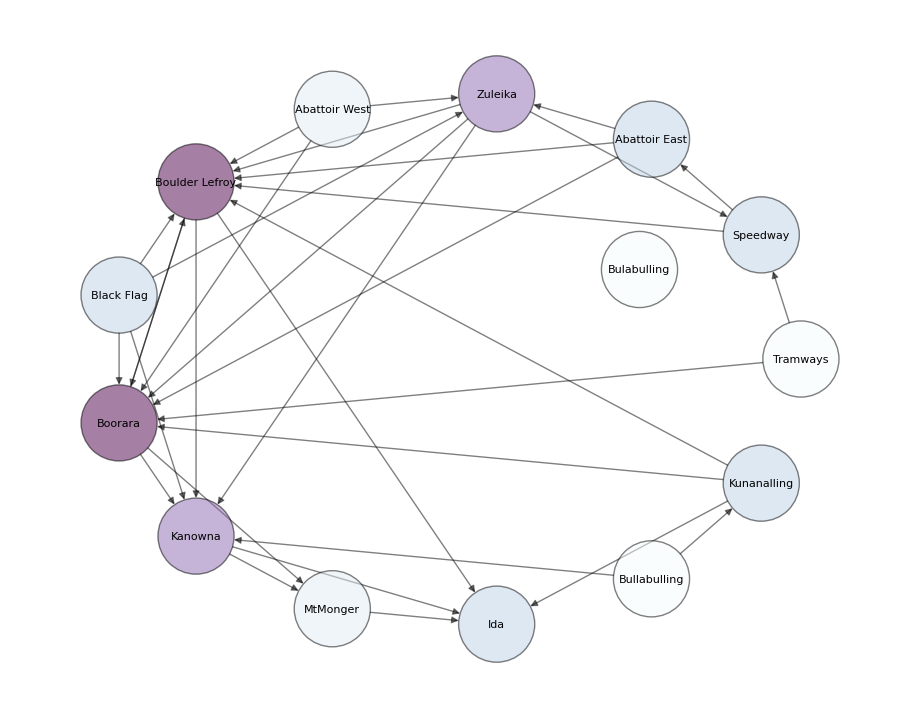

In [16]:
names = ['Ida', 'Kunanalling', 'Bulabulling', 'Zuleika', 'Boulder Lefroy', 'Abattoir West', 'Abattoir East', 
        'Boorara','Kanowna','MtMonger', 'Black Flag', 'Tramways', 'Speedway'] 

colours = np.arange(len(names))
nodes = [n for n in names]
node_colours = {nodes[i]: colours[i] for i in range(len(colours))}

pos = nx.nx_agraph.graphviz_layout(G4, prog = "circo")

colours = np.arange(len(G4.nodes))
d = dict(G4.degree)

fig = plt.figure(1, figsize = (9,7)) 

for i, h in enumerate(weakly_connected_components(G4)):
    sub = G4.subgraph(h)
    colours = [d[list(sub.nodes)[n]] for n in range(len(list(sub.nodes)))]
    
    nx.draw(sub, pos, node_color=colours, edge_color = 'black', cmap='BuPu',  
                    node_size=np.array(list(d.values()))[i]+3000, 
            node_shape = 'o', alpha = 0.5, linewidths=1, edgecolors = 'black')
    
    nx.draw_networkx_labels(sub, pos, font_size=8, font_family='sans-serif')
    
#     edge_labels = nx.get_edge_attributes(sub,'label')
    
#     if len(edge_labels)==0:
#         pass
#     else:
#         nx.draw_networkx_edge_labels(sub, pos, edge_labels = edge_labels, font_size=7)
        
plt.margins(y = .1, x=.1)
plt.show()

In [17]:
# getting edges 
edges = G4.edges()
weights = nx.get_edge_attributes(G4, "n")

scaling_factor = 4 
alphas = [weights[edge] * scaling_factor for edge in edges]

In [18]:
colors = nx.get_edge_attributes(G4,'n').values()

In [19]:
c7 = {3:'black', 2:"red", 1:"blue"}
colors = [c7[k] for k in colors]

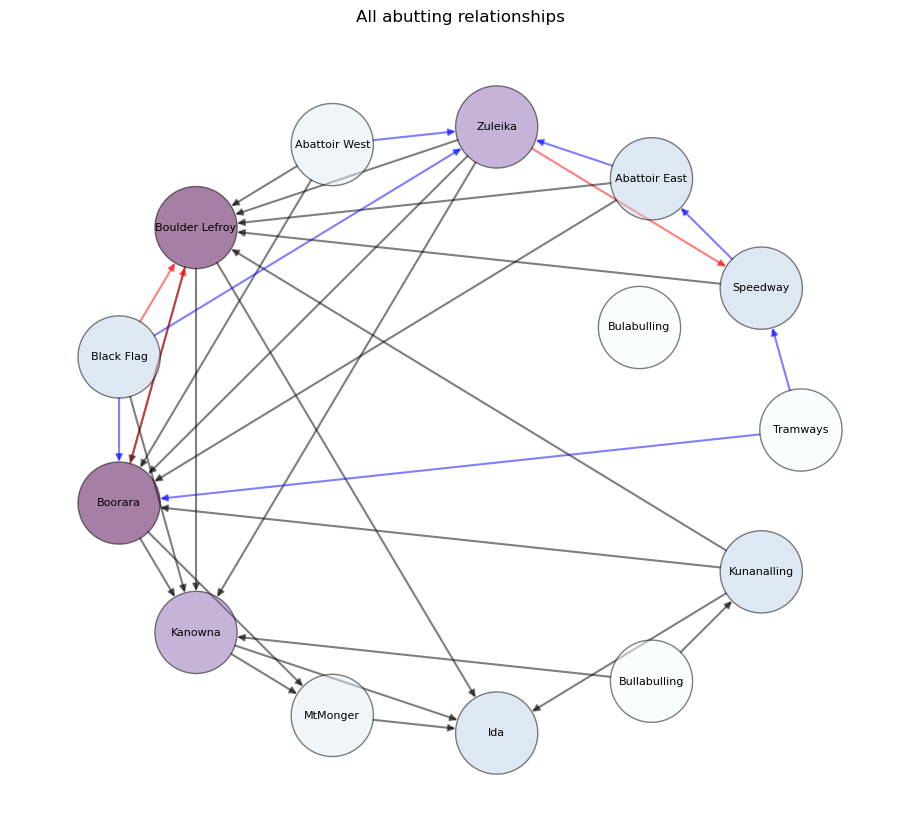

In [53]:
names = ['Ida', 'Kunanalling', 'Bulabulling', 'Zuleika', 'Boulder Lefroy', 'Abattoir West', 'Abattoir East', 
        'Boorara','Kanowna','MtMonger', 'Black Flag', 'Tramways', 'Speedway'] 

colours = np.arange(len(names))
nodes = [n for n in names]
node_colours = {nodes[i]: colours[i] for i in range(len(colours))}

pos = nx.nx_agraph.graphviz_layout(G4, prog = "circo")

colours = np.arange(len(G4.nodes))
d = dict(G4.degree)

fig = plt.figure(1, figsize = (9,8)) 

for i, h in enumerate(weakly_connected_components(G4)):
    sub = G4.subgraph(h)
    colours = [d[list(sub.nodes)[n]] for n in range(len(list(sub.nodes)))]
    
    nx.draw(sub, pos, node_color=colours, cmap='BuPu',  
                    node_size=np.array(list(d.values()))[i]+3500, 
            node_shape = 'o', alpha = 0.5, linewidths=1, edgecolors = 'black', edge_color=colors, width = 1.5)
    
    nx.draw_networkx_labels(sub, pos, font_size=8, font_family='sans-serif')
    
#     nx.draw_networkx_edges(sub, pos)
        
plt.margins(y = .1, x=.1)
plt.title("All abutting relationships")

plt.savefig("C:/Users/aafo0002/Documents/all.png", dpi = 115, bbox_inches = 'tight')

In [385]:
??nx.draw_networkx